In [1]:
import pandas as pd
import numpy as np

* CRIM – per capita crime rate by town
* ZN – proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS – proportion of non-retail business acres per town
* CHAS – Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX – nitric oxides concentration (parts per 10 million)
* RM – average number of rooms per dwelling
* AGE – proportion of owner-occupied units built prior to 1940 (%)
* DIS – weighted distances to five Boston employment centres
* RAD – index of accessibility to radial highways
* TAX – full-value property tax rate per $10,000
* PTRATIO – pupil-teacher ratio by town
* B – 1000 × (Bk − 0.63)² where Bk is the proportion of Black residents by town
* LSTAT – % lower status of the population 
* MEDV – Median value of owner-occupied homes in $ (the target)

In [2]:
# Column names in order
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# Read your dataset without headers
df = pd.read_csv('house_Prediction_Data_Set.csv',header=None)  # adjust delimiter if needed

In [3]:
df = df[0].str.split(expand =True)

In [4]:
df.columns = column_names

In [5]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60


In [6]:
# Converting all column into Numerical Field
for i in df.columns:
    df[i] = df[i].astype('float')

In [7]:
# Converting median value into thousand dollars
df['MEDV'] = df['MEDV'].apply(lambda x: x*1000)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22532.806324
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9197.104087
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5000.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17025.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21200.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25000.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50000.000000


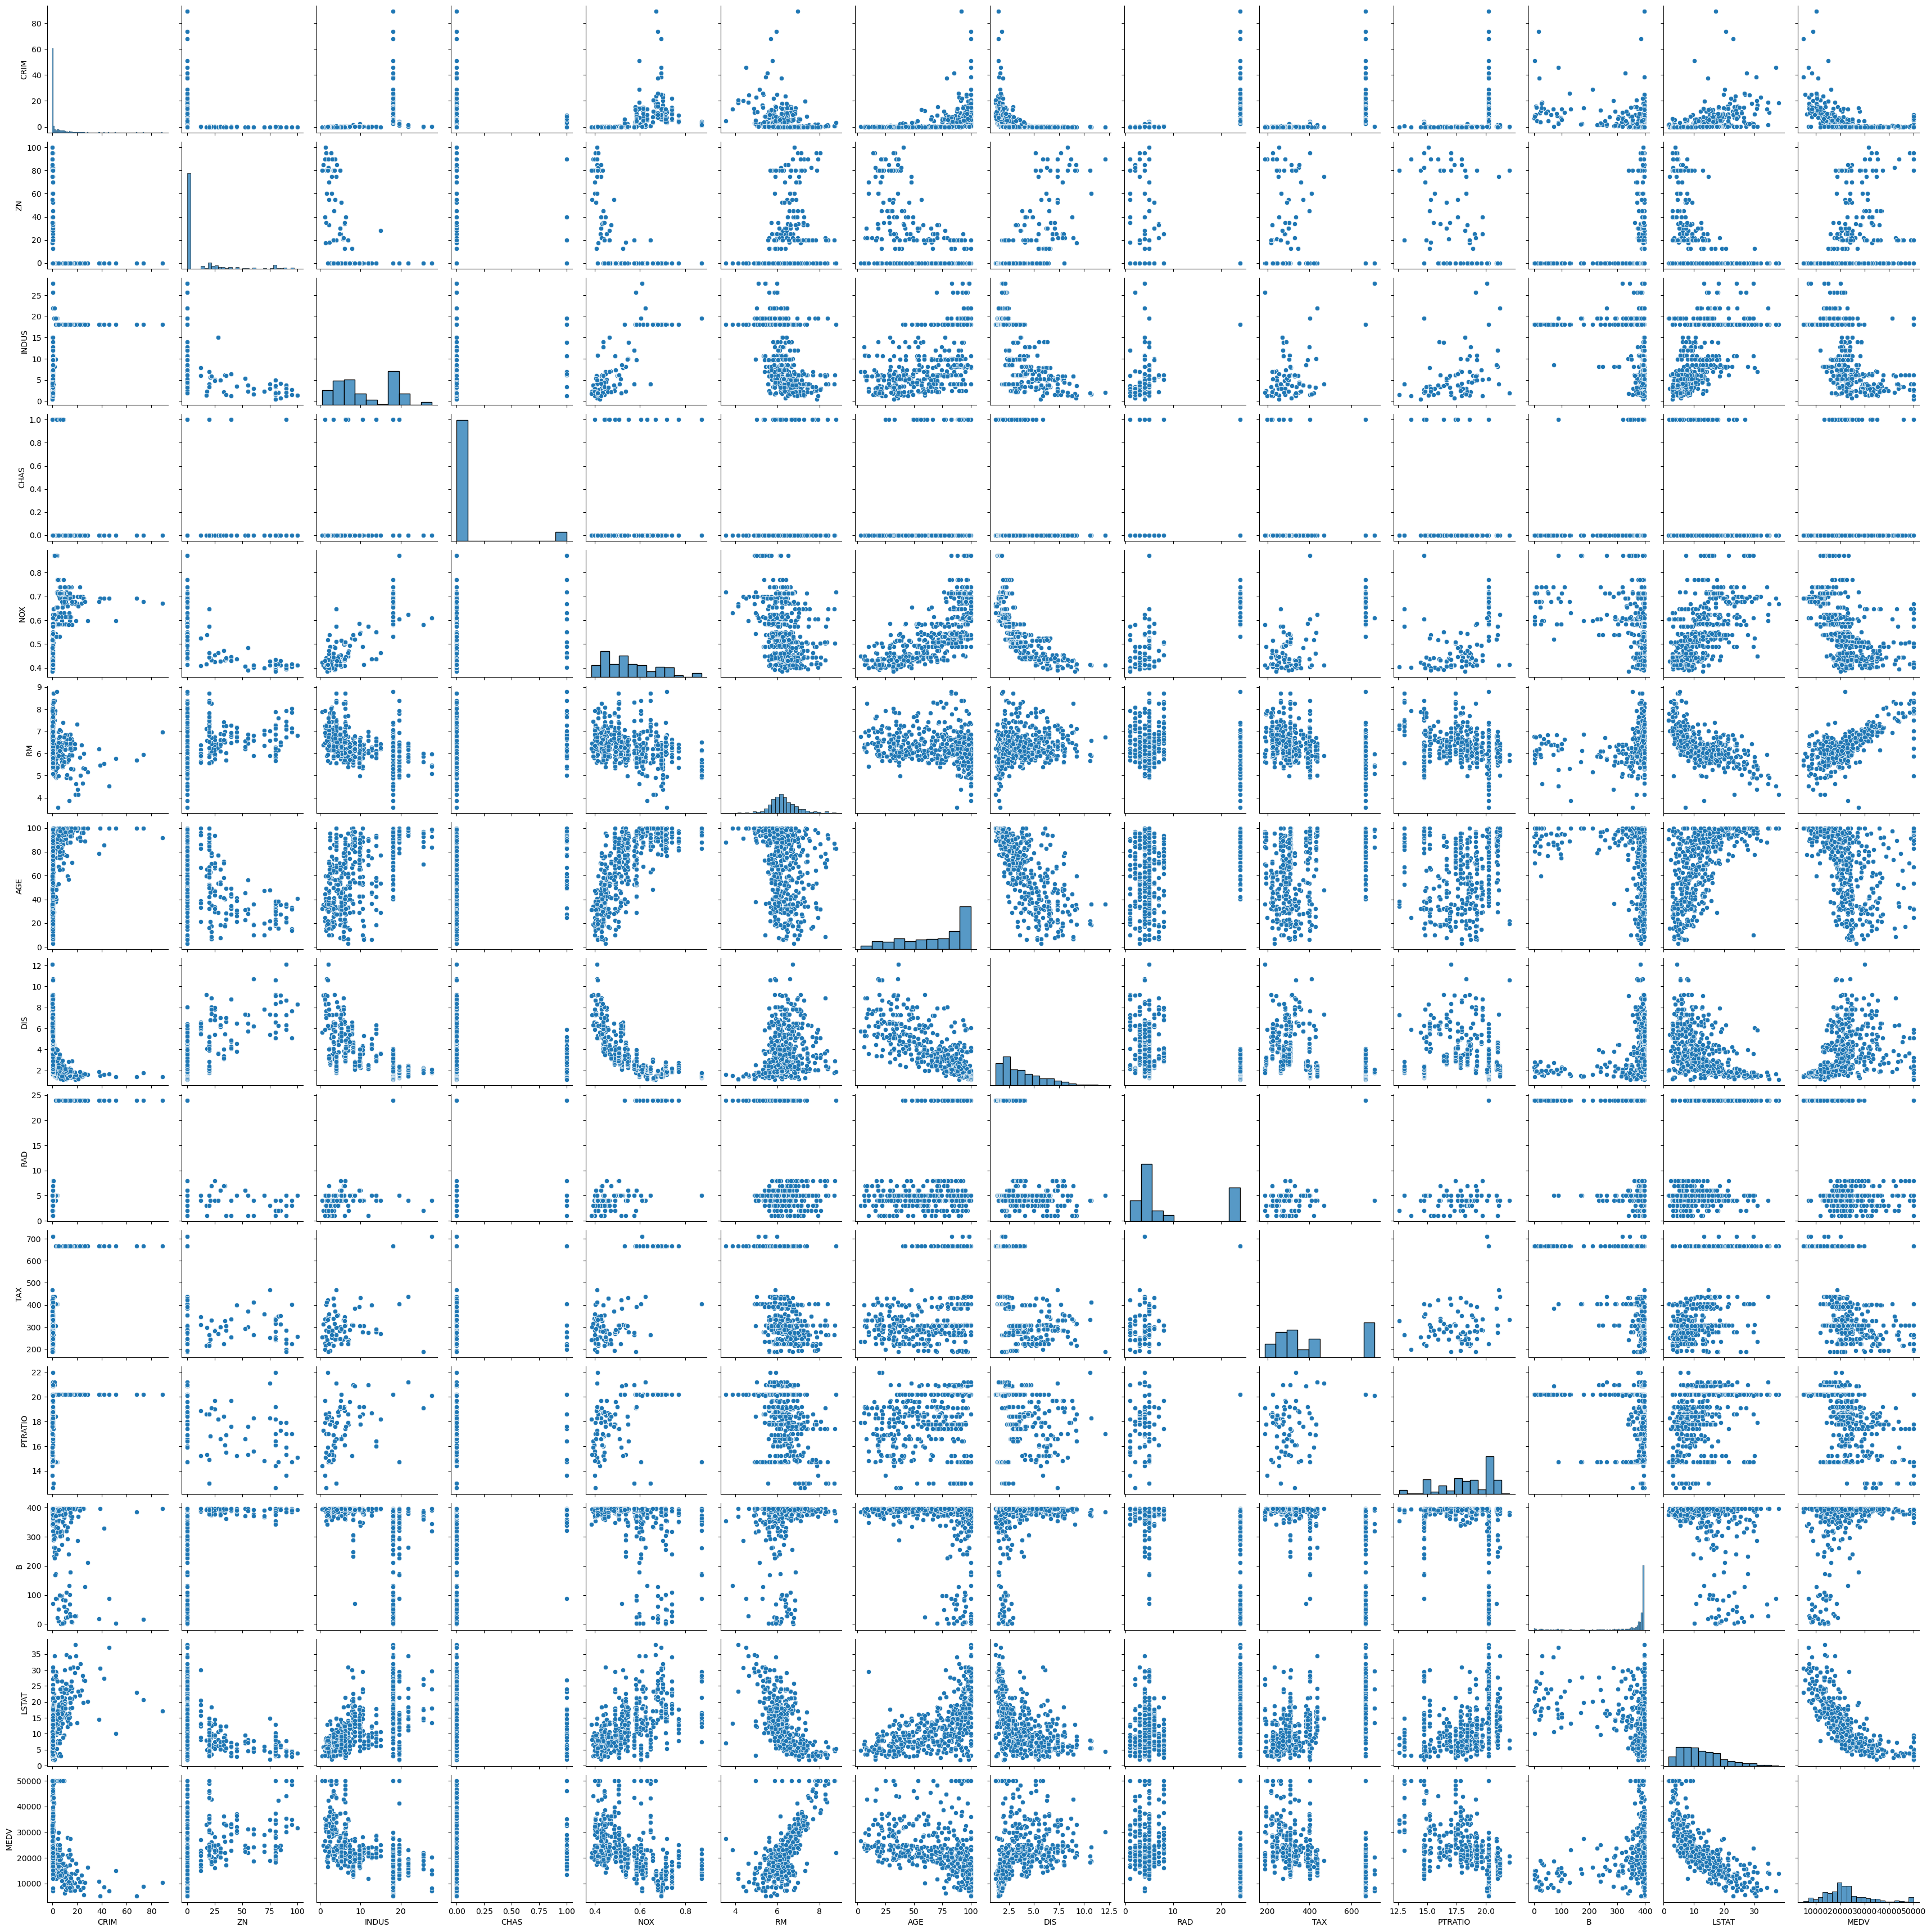

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.show()

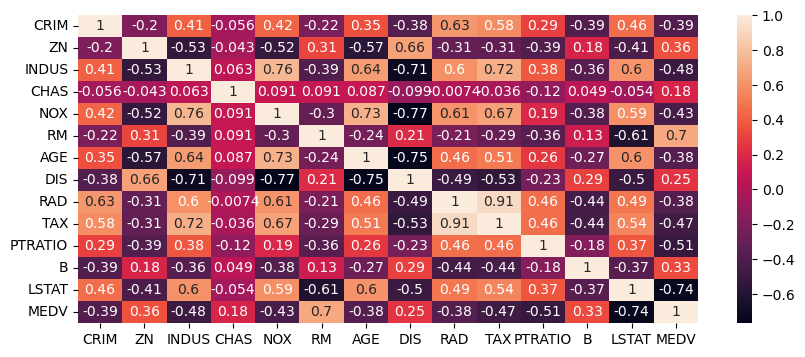

In [12]:
plt.figure(figsize = (10,4))
sns.heatmap(df.corr(),annot = True)
plt.show()

# Building the ML Model

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score,mean_squared_error

In [14]:
x = df.drop(columns = ['MEDV'])
y = df['MEDV']

In [15]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=428)

In [17]:
# Find best value of random state
value = []
for i in range(0,1001):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    lr2 = LinearRegression()
    lr2.fit(x_train,y_train)
    value.append((lr2.score(x_train,y_train),lr2.score(x_test,y_test)))

new_values = []
for i,j in value:
    if i >= j:
        new_values.append((i,j))

np.argmax(new_values,axis = 0)

array([505, 428])

### Linear Regression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = lr.predict(x_test)

In [21]:
# Checking for Overfitting and Underfitting
lr.score(x_train,y_train) , lr.score(x_test,y_test)

(0.7484272373846232, 0.6942826395629559)

In [22]:
print(f'R2_Score: {r2_score(y_test,lr.predict(x_test))}')
print(f'Mean_Squared_Error: {mean_squared_error(y_test,lr.predict(x_test))}')

R2_Score: 0.6942826395629559
Mean_Squared_Error: 26082365.347173195


### Decision Tree

In [23]:
dt = DecisionTreeRegressor()

In [24]:
dt.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [25]:
# Checking for Overfitting and Underfitting
dt.score(x_train,y_train), dt.score(x_test,y_test)

(1.0, 0.822309625462816)

In [26]:
print(f'R2_Score: {r2_score(y_test,dt.predict(x_test))}')
print(f'Mean_Squared_Error: {mean_squared_error(y_test,dt.predict(x_test))}')

R2_Score: 0.822309625462816
Mean_Squared_Error: 15159705.88235294


### Random Forest

In [27]:
rf = RandomForestRegressor()

In [28]:
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
# Checking for Overfitting and Underfitting
rf.score(x_train,y_train), rf.score(x_test,y_test)

(0.9789475594253969, 0.9094695236007901)

In [30]:
print(f'R2_Score: {r2_score(y_test,rf.predict(x_test))}')
print(f'Mean_Squared_Error: {mean_squared_error(y_test,rf.predict(x_test))}')

R2_Score: 0.9094695236007901
Mean_Squared_Error: 7723633.87254902


## Model Comparison
* Random Forest is perform well in this dataset compare to linear regression, decision tree
* Accuracy is high as well as mean squared error is low from other models